## Capstone Project 1: Data Storytelling

Data Source:  http://jmcauley.ucsd.edu/data/amazon/

For this project I will use three product categories datasets: baby products, grocery and gourment foods, and cellephones dataset.

The objective of my Capstone project 1 (sentiment Analysis of Amazon product reviews) is to determine polarity of a review text i.e. whether a given review is positive (rating: 4 or 5) or negative(rating 1 or 2) based on ratings and reviews, which can help businesses make decision based on customer reviews.

In this exploration of Amazon product reviews dataset, I will analyse the features of review text with respect to ratings.
These are the questions I will look in the data:

- How the distribution of data based on review categories (or star ratings) and distribution of review length looks like? 
- How the distribution of number of ratings in different product categories looks like?
- How the reviews change across high and low star ratings based on review length and percentage of UPPERCASE words per review   
  for different product categories?
- what are the most frequently used words for high and low ratings and it's vizualization with word clouds? 



In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud


#### JSON files loaded to pandas DatFrame for the three product categories

In [3]:
# Read json file into a pandas Dataframe

baby_products = pd.read_json('Baby_5.json', lines=True)

# Take a look at the first 5 rows
baby_products.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,1396310400,"04 1, 2014"


In [4]:
grocery_foods = pd.read_json('Grocery_and_Gourmet_Food_5.json', lines=True)
grocery_foods.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [5]:
cell_phones = pd.read_json('Cell_Phones_and_Accessories_5.json', lines=True)
cell_phones.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [6]:
# column names
baby_products.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [7]:
# Rename the columns 

baby_products = baby_products.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})


grocery_foods = grocery_foods.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})

cell_phones = cell_phones.rename(columns = {'overall': 'rating', 'summary': 'review_summary'})
cell_phones.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,rating,review_summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"


In [8]:
# Find out total no of rows and columns

baby_products.shape

(160792, 9)

In [9]:
grocery_foods.shape

(151254, 9)

In [10]:
cell_phones.shape

(194439, 9)

#### Find if there is any missing value in datasets and count them.

In [11]:
# Any misssing values ?
baby_products.isnull().values.any()

True

In [12]:
grocery_foods.isnull().values.any()

True

In [13]:
cell_phones.isnull().values.any()

True

In [14]:
# Count missing values
baby_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160792 entries, 0 to 160791
Data columns (total 9 columns):
reviewerID        160792 non-null object
asin              160792 non-null object
reviewerName      159427 non-null object
helpful           160792 non-null object
reviewText        160792 non-null object
rating            160792 non-null int64
review_summary    160792 non-null object
unixReviewTime    160792 non-null int64
reviewTime        160792 non-null object
dtypes: int64(2), object(7)
memory usage: 11.0+ MB


In [15]:
grocery_foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 9 columns):
reviewerID        151254 non-null object
asin              151254 non-null object
reviewerName      149761 non-null object
helpful           151254 non-null object
reviewText        151254 non-null object
rating            151254 non-null int64
review_summary    151254 non-null object
unixReviewTime    151254 non-null int64
reviewTime        151254 non-null object
dtypes: int64(2), object(7)
memory usage: 10.4+ MB


In [16]:
cell_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
reviewerID        194439 non-null object
asin              194439 non-null object
reviewerName      190920 non-null object
helpful           194439 non-null object
reviewText        194439 non-null object
rating            194439 non-null int64
review_summary    194439 non-null object
unixReviewTime    194439 non-null int64
reviewTime        194439 non-null object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [17]:
# Total number of missing values
print(baby_products.isnull().sum().sum())
print(grocery_foods.isnull().sum().sum())
print(cell_phones.isnull().sum().sum())

1365
1493
3519


There are missing values only in the reviewer's name attribute. For our analysis I will be using only the reviewText and ratings columns. So I will not remove the missing value rows because it does not change the analysis in either ways.

In [11]:
# Keep the review columns and rating (drop the rest of the columns)

baby_products = baby_products.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
grocery_foods = grocery_foods.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
cell_phones = cell_phones.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'])
cell_phones.head(2)

,reviewText,rating,review_summary
0,They look good and stick good! I just don't li...,4,Looks Good
1,These stickers work like the review says they ...,5,Really great product.


#### Check for duplicate review text rows and drop them

In [12]:
# Check for duplicate reviewText 

duplicate_rev_baby = baby_products.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_baby

69

In [13]:
duplicate_rev_food = grocery_foods.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_food

55

In [14]:
duplicate_rev_phone = cell_phones.duplicated(subset='reviewText', keep='first').sum()
duplicate_rev_phone

253

In [15]:
# Drop duplicate reviewText
baby_products = baby_products.drop_duplicates(subset = 'reviewText', keep='first')
len(baby_products)

160723

In [16]:
grocery_foods = grocery_foods.drop_duplicates(subset = 'reviewText', keep='first')
len(grocery_foods)

151199

In [17]:
cell_phones = cell_phones.drop_duplicates(subset = 'reviewText', keep='first')
len(cell_phones)

194186

#### I will remove short review text of less than 3 words. Because sentiment analysis are less effective when review texts are short

In [18]:
# Remove short reviewText: less than < 3 words

def remove_short_review(text):
    length = len(text.split())
    if length >= 3:
        return True
    else:
        return False
    
baby_products = baby_products[baby_products['reviewText'].apply(lambda x:remove_short_review(x))]
len(baby_products)

160662

In [19]:
grocery_foods = grocery_foods[grocery_foods['reviewText'].apply(lambda x: remove_short_review(x))]
len(grocery_foods)

151054

In [20]:
cell_phones = cell_phones[cell_phones['reviewText'].apply(lambda x: remove_short_review(x))]
len(cell_phones)

193876

#### Remove non_English reviews

In [ ]:
from langdetect import detect

def mydetect(txt):
    try:
        return detect(txt)
    except:
        return None

baby_products['clean_review'] = baby_products['reviewText'].apply(mydetect)
baby_products.head(2)

In [ ]:
#for e in baby_products['reviewText']:
    #try:
        #if detect(e) == 'en':
            #print(e)
    #except LangDetectException:
        #pass

In [21]:
# Remove non-English using NLTK
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_non_en(text):
    text = " ".join(w.lower() for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text
baby_products['clean_review_baby'] = baby_products['reviewText'].apply(lambda x: remove_non_en(x))
baby_products.head(5)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect for new . we were able to keep track o...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,this book is such a life saver . it been so he...
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,me know exactly how my day gone with my mother...
3,I bought this a few times for my older son and...,5,repeat buyer,i bought this a few times for my older son and...
4,I wanted an alternative to printing out daily ...,4,Great,i an alternative to printing out daily log for...


In [22]:
grocery_foods['clean_review_food'] = grocery_foods['reviewText'].apply(lambda x: remove_non_en(x))
grocery_foods.head(5)

,reviewText,rating,review_summary,clean_review_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,just another flavor of kit kat but the taste i...
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",i bought this on impulse and it comes from jap...
2,Really good. Great gift for any fan of green t...,4,Yum!,really good . great gift for any fan of green ...
3,"I had never had it before, was curious to see ...",5,Unexpected flavor meld,"i had never had it before , was curious to see..."
4,I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",i ' been looking forward to trying these after...


In [141]:
cell_phones['clean_review_phones'] = cell_phones['reviewText'].apply(lambda x: remove_non_en(x))
cell_phones.head(5)

,reviewText,rating,review_summary,clean_review_phones
0,They look good and stick good! I just don't li...,4,Looks Good,they look good and stick good ! i just don ' t...
1,These stickers work like the review says they ...,5,Really great product.,these stickers work like the review they do . ...
2,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,these are awesome and make my phone look so st...
3,Item arrived in great time and was in perfect ...,4,Cute!,item in great time and was in perfect conditio...
4,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,"awesome ! stays on , and great . can be used o..."


### Distributions

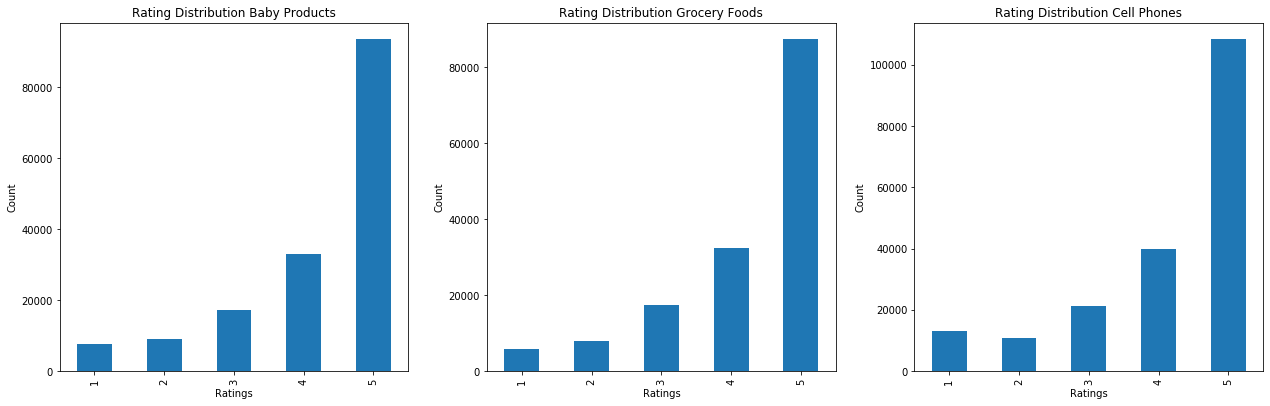

In [75]:
# Rating Distributions
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1); baby_products['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Baby Products').set(xlabel='Ratings', ylabel="Count")
plt.subplot(1,3,2); grocery_foods['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Grocery Foods').set(xlabel='Ratings', ylabel="Count")
plt.subplot(1,3,3);cell_phones['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution Cell Phones').set(xlabel='Ratings', ylabel="Count")
plt.tight_layout(pad=2)

We notice that most of the reviews are five stars in all the three product categories

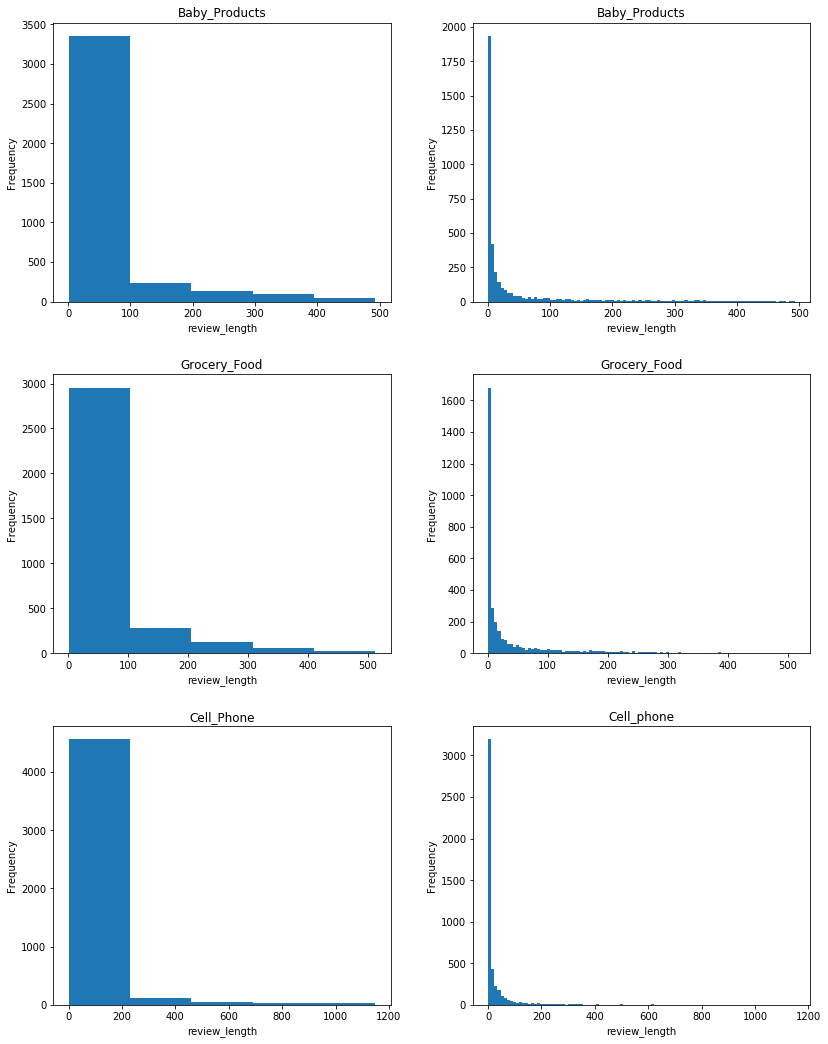

In [50]:
# Review length Distribution
rev_len_baby = baby_products['reviewText'].apply(len)
rev_len_food = grocery_foods['reviewText'].apply(len)
rev_len_phone = cell_phones['reviewText'].apply(len)
plt.figure(figsize=(12,15))
plt.subplot(3, 2, 1); rev_len_baby.value_counts().sort_index().plot(kind='hist', bins= 5, title='Baby_Products').set_xlabel('review_length')
plt.subplot(3, 2, 2);rev_len_baby.value_counts().sort_index().plot(kind='hist', bins= 100, title='Baby_Products').set_xlabel('review_length')
plt.subplot(3, 2, 3);rev_len_food.value_counts().sort_index().plot(kind='hist', bins= 5, title='Grocery_Food').set_xlabel('review_length')
plt.subplot(3, 2, 4);rev_len_food.value_counts().sort_index().plot(kind='hist', bins= 100, title='Grocery_Food').set_xlabel('review_length')
plt.subplot(3, 2, 5);rev_len_phone.value_counts().sort_index().plot(kind='hist', bins= 5, title='Cell_Phone').set_xlabel('review_length')
plt.subplot(3, 2, 6);rev_len_phone.value_counts().sort_index().plot(kind='hist', bins= 100, title='Cell_phone').set_xlabel('review_length')
plt.tight_layout(pad=2.5)

Most of the baby product and grocery food reviews are of length 100 but cell phone reviews are little longer.

#### Distribution of review length and percentage of UPPERCASE per review across the different levels of star ratings

In [53]:
# baby_products distribution

rev_rating = baby_products[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_baby = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_baby.head(2)

,rating,rev_length,capitals
0,5,253,0.011858
1,5,556,0.008993


In [54]:
# Grocery_foods_Distribution

rev_rating = grocery_foods[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_food = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_food.head(2)

,rating,rev_length,capitals
0,4,162,0.030864
1,3,583,0.015437


In [55]:
# Cell_phones_Distribution
rev_rating = cell_phones[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['rev_length'] = rev_rating_copy['reviewText'].apply(len) # review length

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text])

rev_rating_copy['capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_phone = rev_rating_copy[['rating', 'rev_length', 'capitals']]
rating_len_cap_phone.head(2)

,rating,rev_length,capitals
0,4,189,0.026455
1,5,160,0.025000


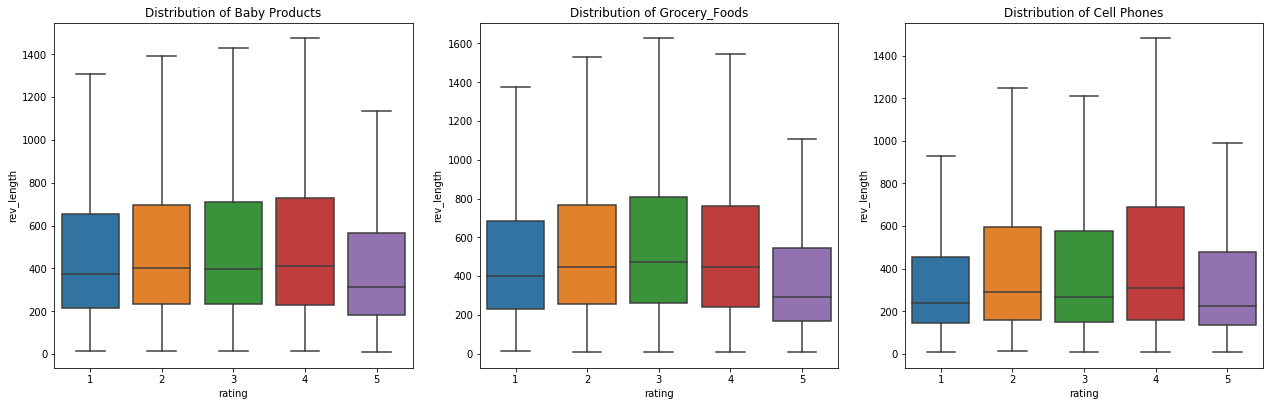

In [76]:
# rating and review length distribution for baby products
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1); sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_baby, showfliers=False).set(title='Distribution of Baby Products')
plt.subplot(1,3,2); sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_food, showfliers=False).set(title='Distribution of Grocery_Foods')
plt.subplot(1,3,3);sns.boxplot(x = 'rating', y = 'rev_length', data = rating_len_cap_phone, showfliers=False).set(title='Distribution of Cell Phones')
plt.tight_layout(pad=2)

In all of the three product categories, reviews corresponding to five star ratings are shorter length.

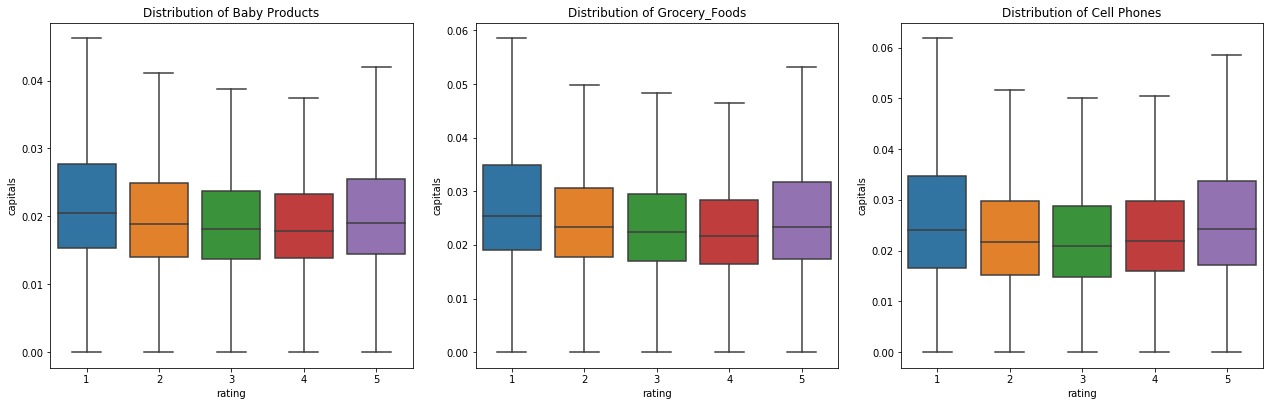

In [78]:
# Rating and % caps distribution baby_products
plt.figure(figsize=(18,6))
plt.subplot(1,3,1);sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_baby, showfliers=False).set(title='Distribution of Baby Products')
plt.subplot(1,3,2);sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_food, showfliers=False).set(title='Distribution of Grocery_Foods')
plt.subplot(1,3,3);sns.boxplot(x = 'rating', y = 'capitals', data = rating_len_cap_phone, showfliers=False).set(title='Distribution of Cell Phones')
plt.tight_layout(pad=2)

In all the three product categories, reviews corresponding to 1 star and 5 star ratings has more uppercase letters

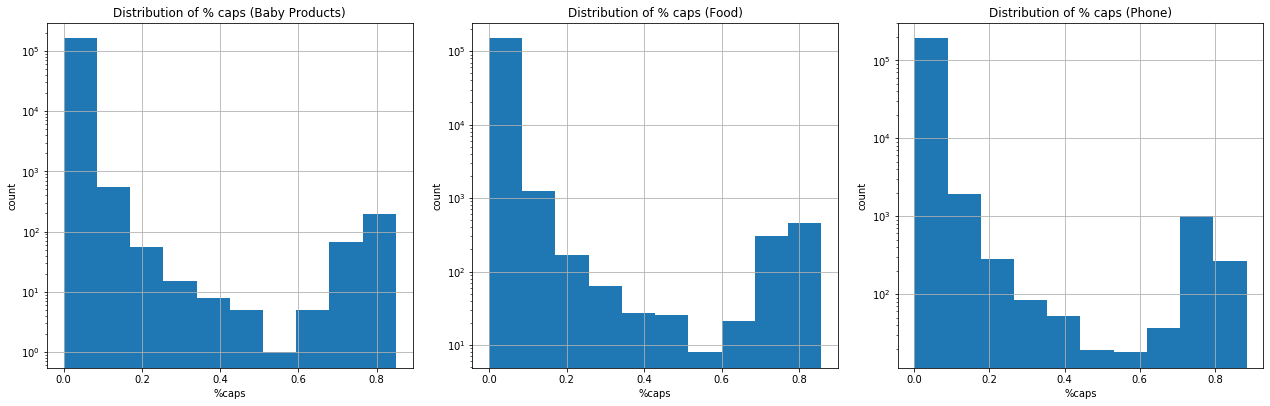

In [88]:
# Distribution of % caps baby_products

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)

rating_len_cap_baby['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Baby Products)')
plt.xlabel('%caps')
plt.ylabel('count')

# Distribution of % caps grocery_food
plt.subplot(1,3,2); rating_len_cap_food['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Food)')
plt.xlabel('%caps')
plt.ylabel('count')

# Distribution of % caps cell_phones
plt.subplot(1,3,3); rating_len_cap_phone['capitals'].hist()
plt.yscale('log', nonposy='clip')
plt.title('Distribution of % caps (Phone)')
plt.xlabel('%caps')
plt.ylabel('count')

plt.tight_layout(pad=2.0)

Text(0.5, 1.0, 'Distribution of % caps(>0.6) vs ratings Baby Products')

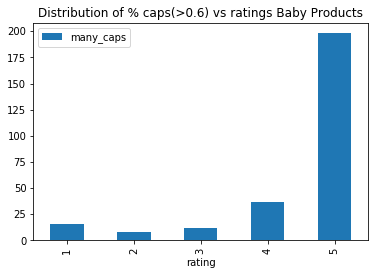

In [106]:
rating_len_cap_baby['many_caps'] = rating_len_cap_baby['capitals'].apply(lambda x: x > .6)
rating_len_cap_baby[['rating','many_caps']].groupby('rating').sum().plot(kind='bar')
plt.title('Distribution of % caps(>0.6) vs ratings Baby Products')

Text(0.5, 1.0, 'Distribution of % caps(>0.6) vs ratings (Food)')

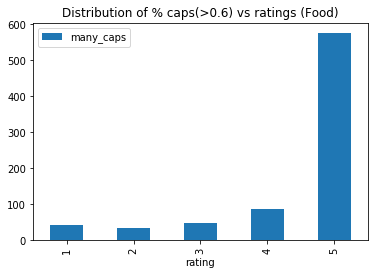

In [112]:
rating_len_cap_food['many_caps'] = rating_len_cap_food['capitals'].apply(lambda x: x > .6)
rating_len_cap_food[['rating','many_caps']].groupby('rating').sum().plot(kind='bar')
plt.title('Distribution of % caps(>0.6) vs ratings (Food)')

Text(0.5, 1.0, 'Distribution of % caps(>0.6) vs ratings (Phone)')

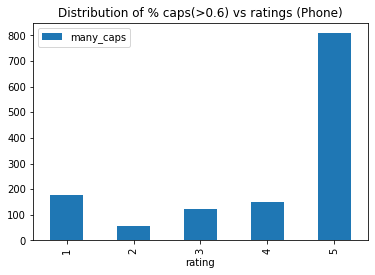

In [113]:
rating_len_cap_phone['many_caps'] = rating_len_cap_phone['capitals'].apply(lambda x: x > .6)
rating_len_cap_phone[['rating','many_caps']].groupby('rating').sum().plot(kind='bar')
plt.title('Distribution of % caps(>0.6) vs ratings (Phone)')

For all the three product categories the % caps shows bimodal distribution. The reviews containing greater than 60% uppercase letters are mostly rated 5 stars. 

### Text Pre-Processing


- Remove punctuations
- Remove Stopwords
- Tokenization: converting a sentence into a list of words
- Lower case
- Stemming/ Lemmatization: Reduce a word to it's root or base units

In [23]:
# Remove punctuations

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].str.replace('[^\w\s]','')
baby_products.head(5)

,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect for new we were able to keep track of...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,this book is such a life saver it been so hel...
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,me know exactly how my day gone with my mother...
3,I bought this a few times for my older son and...,5,repeat buyer,i bought this a few times for my older son and...
4,I wanted an alternative to printing out daily ...,4,Great,i an alternative to printing out daily log for...


In [24]:
# Remove Stop Words
import nltk
stop_words = nltk.corpus.stopwords.words('english')
nltk.download('stopwords')

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].apply(lambda x: " ".join(w for w in x.split() if w not in stop_words))
baby_products.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,perfect new able keep track baby feeding sleep...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,book life saver helpful able go back track ans...
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,know exactly day gone mother law watching go w...
3,I bought this a few times for my older son and...,5,repeat buyer,bought times older son bought super easy use k...
4,I wanted an alternative to printing out daily ...,4,Great,alternative printing daily log nanny fill work...


In [25]:
len(baby_products)

160662

#### Tokenization

In [26]:
# import libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# tokenize 

def tokenization(text):
    return word_tokenize(text)

baby_products['clean_review_baby'] = baby_products['clean_review_baby'].apply(lambda x: tokenization(x.lower()))
baby_products.head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewText,rating,review_summary,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,"[perfect, new, able, keep, track, baby, feedin..."
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,"[book, life, saver, helpful, able, go, back, t..."
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,"[know, exactly, day, gone, mother, law, watchi..."
3,I bought this a few times for my older son and...,5,repeat buyer,"[bought, times, older, son, bought, super, eas..."
4,I wanted an alternative to printing out daily ...,4,Great,"[alternative, printing, daily, log, nanny, fil..."


In [27]:
# clean_review to list of strings
baby_products['clean_review_baby_str'] = baby_products['clean_review_baby'].apply(str)
baby_products.head(5)

,reviewText,rating,review_summary,clean_review_baby,clean_review_baby_str
0,Perfect for new parents. We were able to keep ...,5,Awesine,"[perfect, new, able, keep, track, baby, feedin...","['perfect', 'new', 'able', 'keep', 'track', 'b..."
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,"[book, life, saver, helpful, able, go, back, t...","['book', 'life', 'saver', 'helpful', 'able', '..."
2,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,"[know, exactly, day, gone, mother, law, watchi...","['know', 'exactly', 'day', 'gone', 'mother', '..."
3,I bought this a few times for my older son and...,5,repeat buyer,"[bought, times, older, son, bought, super, eas...","['bought', 'times', 'older', 'son', 'bought', ..."
4,I wanted an alternative to printing out daily ...,4,Great,"[alternative, printing, daily, log, nanny, fil...","['alternative', 'printing', 'daily', 'log', 'n..."


### Word Clouds for high ratings vs low ratings

In [30]:
high_rating = baby_products[baby_products.rating >=4]
high_rating = high_rating.drop(columns= ['reviewText', 'review_summary', 'clean_review_baby'])
high_rating.head(2)

,rating,clean_review_baby_str
0,5,"['perfect', 'new', 'able', 'keep', 'track', 'b..."
1,5,"['book', 'life', 'saver', 'helpful', 'able', '..."


In [31]:
low_rating = baby_products[baby_products.rating < 3]
low_rating = low_rating.drop(columns= ['reviewText', 'review_summary', 'clean_review_baby'])
low_rating.head(2)

,rating,clean_review_baby_str
74,1,"['ridiculous', 'huge', 'hard', 'clamp', 'daugh..."
92,1,"['product', 'little', 'boy', 'chew', 'teething..."


In [32]:
high = " ".join(review for review in high_rating.clean_review_baby_str)
low = " ".join(review for review in low_rating.clean_review_baby_str)

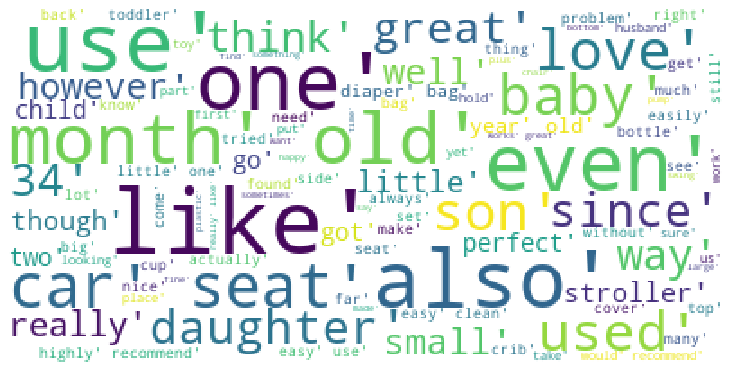

In [33]:
# import library

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator 
import matplotlib.pyplot as plt

# Generate WordCloud images for high ratings

wordcloud_high = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(high)

# Display the image

plt.figure( figsize=(10,8))
plt.imshow(wordcloud_high)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Rating')]

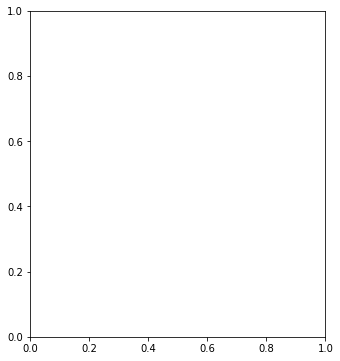

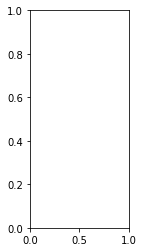

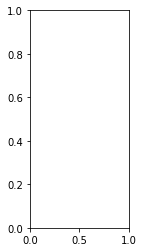

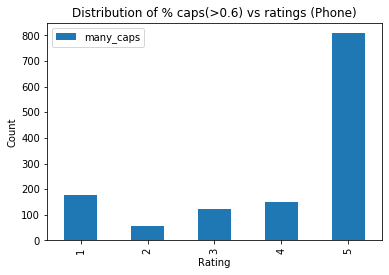

In [92]:
rating_len_cap_baby['many_caps'] = rating_len_cap_baby['capitals'].apply(lambda x: x > .6)
rating_len_cap_food['many_caps'] = rating_len_cap_food['capitals'].apply(lambda x: x > .6)
rating_len_cap_phone['many_caps'] = rating_len_cap_phone['capitals'].apply(lambda x: x > .6)

baby_caps = rating_len_cap_baby[['rating','many_caps']].groupby('rating').sum()
food_caps = rating_len_cap_food[['rating','many_caps']].groupby('rating').sum()
phone_caps = rating_len_cap_phone[['rating','many_caps']].groupby('rating').sum()

# Distribution of %caps(>0.6)
plt.figure(figsize=(18,6))

plt.subplot(1,3,1); baby_caps.plot(kind='bar', title='Distribution of % caps(>0.6) vs ratings (Baby Products)').set(xlabel='Rating', ylabel="Count")

plt.subplot(1,3,2); food_caps.plot(kind='bar', title='Distribution of % caps(>0.6) vs ratings (Grocery_Food)').set(xlabel='Rating', ylabel="Count")

plt.subplot(1,3,3); phone_caps.plot(kind='bar', title='Distribution of % caps(>0.6) vs ratings (Phone)').set(xlabel='Rating', ylabel="Count")


(-0.5, 399.5, 199.5, -0.5)

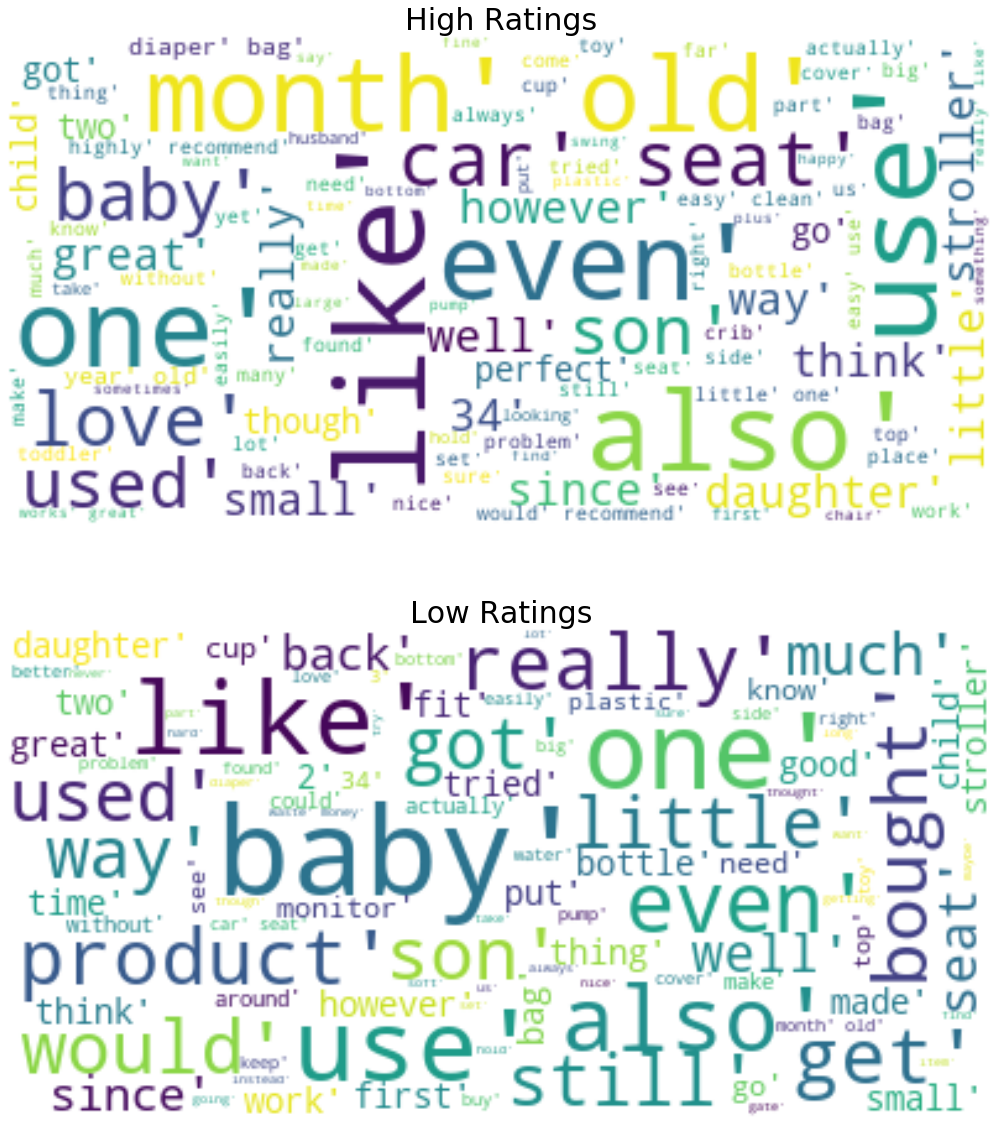

In [35]:
# import library

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator 
import matplotlib.pyplot as plt


high = " ".join(review for review in high_rating.clean_review_baby_str)
low = " ".join(review for review in low_rating.clean_review_baby_str)


fig, axs = plt.subplots(2, 1, figsize  = (20,20))


# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(high)
wordcloud_low = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(low)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('High Ratings', fontsize=30)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Low Ratings', fontsize=30)
axs[1].axis('off')